#<b>Task 1 - Business understanding <b>

##<b>Subtask 1a.</b>

**Business Problem** - **Dealers projecting low sales margins and profit ratios, despite having a diverse portfolio of cars**







##<b>Subtask 1b. </b>

**3 Data Science Solutions for the business problem**

**Solution 1**- Forecasting the demands

* A model could be built which can predict the future demand of the vehicles .
* **Required Data**- Features of the automobile along with its historical sales data.
* **Required Business Capacity** - Employees with good knowledge about the automobile market and having a good knowledge about the business. They should be able to think critically where the model suggests vehicles with higher future demands.

**Solution 2**- Sales, Marketing and Promotion           

1.     **Classification Model based on Best-Selling Cars till date:**
*       Determine which models are selling well and which are not.
   Examine the profit margins for each model. Identify models with high sales but low profit margins and vice versa.
   Identify regions where sales are strong or weak. Understand the local market dynamics and preferences..
2.  **Marketing Strategies:**
*        Evaluate the effectiveness of current marketing strategies. Are you targeting the right audience with the right message? Assess the impact of promotional offers on sales and profit margins. Identify which promotions work best.Consider implementing dynamic pricing strategies to maximize revenue based on demand, seasonality, and other factors.


**Required data**: Historical Data of the Car's Feature with their popularity.

**Required business capacity**: A Marketing team, based on the decision from the model would plan their pitch and promotion ideas to the customer keeping the profit figures and historical sales figure in mind.


**Solution 3**- Regression Model for Cost and Inventory Optimization           

1.    **Inventory according to Popularity and MSRP:**
*   Maintain inventory levels that reflect public demand and car popularity to reduce overall operating costs. Stocking only what is likely to sell quickly ensures more efficient use of resources.
2.  **Minimize Excess Inventory**
*   Focus on stocking cars that meet current demand to avoid the mismanagement and time loss associated with handling excess inventory. This streamlined approach saves time and reduces costs associated with unsold stock.
3. **Identifying Popular Price Segments:**
*   Stock cars primarily in the price segments where most customers are active. This strategy helps attract a broader customer base, leading to higher sales and better profit margins, while avoiding the need to invest heavily in high-end, expensive vehicles that may sell slowly.


**Required data**: Historical Data of the Car sales figure with their popularity.

**Required business capacity**: Given that there's a team particularly assigned to market Analysis, which will verify the generated and recommended Output and Decisions of the Model and will present to the management for further decision making for Optimizing the given two prospects.





##<b> Subtask 1c. </b>

**Final Solution**: Regression Model for Cost and Inventory Optimization

**Prediction Subject**: Popularity

**Domain Concepts** :
* Engine Capacity
* Efficiency
* MSRP
* Make
* Vehicle Demographics

**Sub Concepts**

* Engine Capacity - Horsepower, cylinders, fuel type
* Efficiency - City miles per gallon and highway miles per gallon
* Make - Model and Year
* Vehicle Demographics - Vehicle style and vehicle size

**Hierarchical Graph**



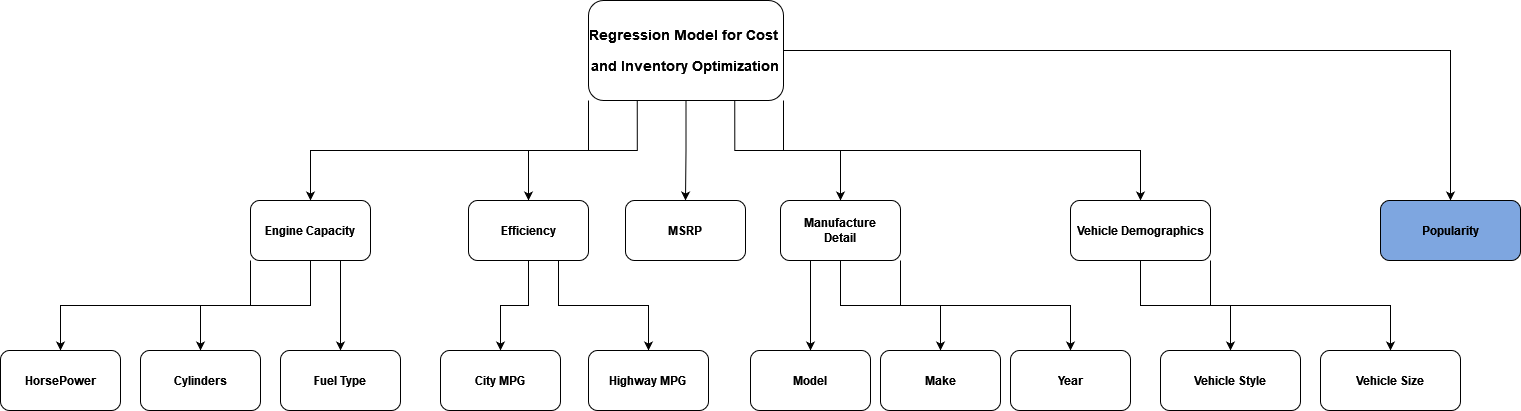


## <b>Subtask 1d</b>

**Analytical Base Table**

| Feature Name            | Domain Concept        | Feature Description                                                | Feature Type | Data Type   |
|-------------------------|-----------------------|--------------------------------------------------------------------|--------------|-------------|
| Horsepower              | Engine Capacity       | The engine power output of the vehicle, measured in horsepower     | Raw          | Continuous  |
| Cylinders               | Engine Capacity       | The number of cylinders in the vehicle's engine.                   | Raw          | Continuous  |
| Fuel Type               | Engine Capacity       | The type of fuel used by the vehicle's engine.                     | Raw          | Categorical |
| City miles per gallon   | Efficiency            | The fuel efficiency of the vehicle when driving in urban areas.    | Raw          | Continuous  |
| Highway Miles per Gallon| Efficiency            | The fuel efficiency of the vehicle when driving on highways.       | Raw          | Continuous  |
| MSRP                    | MSRP                  | The Manufacturer's Suggested Retail Price of the vehicle.          | Raw          | Continuous  |
| Make                    | Manufacturer Details  | The brand or manufacturer of the vehicle.                          | Raw          | Categorical |
| Model                   | Manufacturer Details  | The specific model name or designation of the vehicle.             | Raw          | Categorical |
| Year                    | Manufacturer Details  | The year the vehicle model was manufactured or released.           | Raw          | Continuous  |
| Vehicle Size            | Vehicle Demographics  | The classification of the vehicle based on its overall size.       | Raw          | Categorical |
| Vehicle Style           | Vehicle Demographics  | The body style or design of the vehicle.                           | Raw          | Categorical |



#<b>Task 2 - Data Exploration <b>

In [ ]:
import pandas as pd
import numpy as np
path = "/content/drive/MyDrive/data.csv"
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Data Quality Report for the resulting ABT**

## **Subtask 2a.**

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.describe(exclude=['number'])

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


In [ ]:
df.describe(include=['number']).round(2)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.00,11845.00,11884.00,11908.00,11914.00,11914.00,11914.00,11914.00
mean,2010.38,249.39,5.63,3.44,26.64,19.73,1554.91,40594.74
std,7.58,109.19,1.78,0.88,8.86,8.99,1441.86,60109.10
min,1990.00,55.00,0.00,2.00,12.00,7.00,2.00,2000.00
25%,2007.00,170.00,4.00,2.00,22.00,16.00,549.00,21000.00
50%,2015.00,227.00,6.00,4.00,26.00,18.00,1385.00,29995.00
75%,2016.00,300.00,6.00,4.00,30.00,22.00,2009.00,42231.25
max,2017.00,1001.00,16.00,4.00,354.00,137.00,5657.00,2065902.00


In [ ]:
stats = {"Miss %": lambda df: (df.isna().sum() / len(df)) * 100 }
contin_feat_names = df.select_dtypes("number").columns
continuous_data_df = df[contin_feat_names]

report_df = pd.DataFrame(index=contin_feat_names, columns=stats.keys())

for stat_name, fn in stats.items():
  report_df[stat_name] = fn(continuous_data_df)
report_df

,Miss %
Year,0.000000
Engine HP,0.579151
Engine Cylinders,0.251805
Number of Doors,0.050361
highway MPG,0.000000
city mpg,0.000000
Popularity,0.000000
MSRP,0.000000


In [ ]:
len(df)

11914

**Total number of duplicate values**

In [ ]:
# Identification of the duplicate records

duplicate_rows=df.duplicated().sum()
print("Total number of duplicate rows ", duplicate_rows)

Total number of duplicate rows  715


## **Subtask 2b.**

**Steps to be followed in our data quality plan to preprocess the dataset**

*   Find out the total number of duplicate rows in the dataset. Drop the duplicate rows.
*   Remove the columns which have many null values and cannot be drawn insights from.
*   Filling out the missing values in the column if exist and then replacing them with either mean, median or mode of that particular feature.
*   Handling the outliers in the dataset.


#<b>Task 3 - Data Preparation <b>

## **Subtask 3a.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.convert_dtypes().head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335,6,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300,6,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230,6,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# dropping the duplicate rows in the dataset

df=df.drop_duplicates()

In [ ]:
len(df)

11199

**Finding out the missing values in the dataaset**

In [ ]:
df.isnull().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

In [ ]:
for column in df.columns.tolist():
  print("Null values in column ",column, "are ",df[column].isnull().sum())

Null values in column  Make are  0
Null values in column  Model are  0
Null values in column  Year are  0
Null values in column  Engine Fuel Type are  3
Null values in column  Engine HP are  69
Null values in column  Engine Cylinders are  30
Null values in column  Transmission Type are  0
Null values in column  Driven_Wheels are  0
Null values in column  Number of Doors are  6
Null values in column  Market Category are  3376
Null values in column  Vehicle Size are  0
Null values in column  Vehicle Style are  0
Null values in column  highway MPG are  0
Null values in column  city mpg are  0
Null values in column  Popularity are  0
Null values in column  MSRP are  0


In [ ]:
# dropping the Market Category Column as it has many missing values and does not give meaningful insights to predict the taget variable
df.drop(columns=['Market Category'],axis=1,inplace=True)

<ipython-input-14-e7643004c0aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Market Category'],axis=1,inplace=True)


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df[df['Engine Fuel Type']=='electric'][['Engine HP','Engine Fuel Type']].head()

,Engine HP,Engine Fuel Type
539,NaN,electric
540,NaN,electric
541,NaN,electric
1680,177.0,electric
1681,177.0,electric


In [ ]:
df[df['Engine Fuel Type']=='electric'][['Engine Cylinders','Engine Fuel Type']]

,Engine Cylinders,Engine Fuel Type
539,0.0,electric
540,0.0,electric
541,0.0,electric
1680,0.0,electric
1681,0.0,electric
1682,0.0,electric
1983,NaN,electric
1984,NaN,electric
3716,NaN,electric
3717,NaN,electric


In [ ]:
# finding out the mode value of the Engine Fuel Type Column
df['Engine Fuel Type'].mode()

0    regular unleaded
Name: Engine Fuel Type, dtype: object

In [ ]:
# Filling the value of Engine HP with '0' as the all have the Engine Fuel Type of Electric.
df['Engine HP']=df['Engine HP'].fillna(0)

# Filling the NaN values with '0' in the Engine Cylinder column as all have the Fuel Type of Electric
df['Engine Cylinders']=df['Engine Cylinders'].fillna(0)

#Filling the Engine Fuel Type with the mode of the column
df['Engine Fuel Type']=df['Engine Fuel Type'].fillna('regular unleaded')

# Filling the Number of Doors with the mean of the column
df['Number of Doors']=df['Number of Doors'].fillna(df['Number of Doors'].mean())

In [ ]:
# let us see that we have successfully filled the null values in the columns with the help of the below code

for column in df.columns.tolist():
  print("Null values in column ",column, "are ",df[column].isnull().sum())

Null values in column  Make are  0
Null values in column  Model are  0
Null values in column  Year are  0
Null values in column  Engine Fuel Type are  0
Null values in column  Engine HP are  0
Null values in column  Engine Cylinders are  0
Null values in column  Transmission Type are  0
Null values in column  Driven_Wheels are  0
Null values in column  Number of Doors are  0
Null values in column  Vehicle Size are  0
Null values in column  Vehicle Style are  0
Null values in column  highway MPG are  0
Null values in column  city mpg are  0
Null values in column  Popularity are  0
Null values in column  MSRP are  0


In [ ]:
df['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [ ]:
len(df[df['Transmission Type']=='UNKNOWN'])

12

In [ ]:
# removing the rows which have the values of 'UNKNOWN' for the Transmission Type

df.drop(df[df['Transmission Type']=='UNKNOWN'].index, axis='index',inplace=True)

In [ ]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
continuous_columns=df.describe(include=['number']).round(2).columns

In [ ]:
# Finding the number of outliers in the dataset
for column in continuous_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)

  IQR = Q3-Q1
  print(f"IQR for the column {column} is= {Q3} - {Q1} = {IQR}")

IQR for the column Year is= 2016.0 - 2007.0 = 9.0
IQR for the column Engine HP is= 303.0 - 170.0 = 133.0
IQR for the column Engine Cylinders is= 6.0 - 4.0 = 2.0
IQR for the column Number of Doors is= 4.0 - 2.0 = 2.0
IQR for the column highway MPG is= 30.0 - 22.0 = 8.0
IQR for the column city mpg is= 22.0 - 16.0 = 6.0
IQR for the column Popularity is= 2009.0 - 549.0 = 1460.0
IQR for the column MSRP is= 43050.0 - 21622.5 = 21427.5


In [ ]:
# the columns that we think we should remove the outliers are highway MPG, city MPG, MSRP, Engine HP and Cylinders

outlier_columns=['highway MPG','city mpg','MSRP','Engine HP','Engine Cylinders']

In [ ]:
for i in outlier_columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)

  IQR = Q3-Q1
  outliers_df=[]
  outliers_df = df[(df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))]
  print(f"Num of outliers for the column {i}: ", len(outliers_df))
  df.drop(outliers_df.index, axis='index',inplace=True)



Num of outliers for the column highway MPG:  182
Num of outliers for the column city mpg:  130
Num of outliers for the column MSRP:  929
Num of outliers for the column Engine HP:  50
Num of outliers for the column Engine Cylinders:  29


#<b>Task 4- Data Insights</b>



<h2><b>Subtask 4a.</b></h2>

**Summary Statistics of the dataset**

In [ ]:
column_list=df.columns.to_list()

In [ ]:

for i in column_list:
  print(f"Unique Values for column {i} :", df[i].unique())
  print(f"Total number of unique values in column {i} :", len(df[i].unique()))
  print("\n")

Unique Values for column Make : ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Alfa Romeo' 'Toyota' 'Pontiac' 'Porsche' 'Saab' 'GMC'
 'Hyundai' 'Plymouth' 'Honda' 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac'
 'Kia' 'Chevrolet' 'Dodge' 'Lincoln' 'Subaru' 'Volkswagen' 'Buick' 'Acura'
 'Land Rover' 'Lotus' 'Lexus' 'Infiniti' 'Scion' 'Genesis' 'Maserati'
 'HUMMER']
Total number of unique values in column Make : 38


Unique Values for column Model : ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '4C' '4Runner'
 '5 Series Gran Turismo' '5 Series' '500-Class' '500' '500L' '500X'
 '560-Class' '5' '6 Series' '6000' '626' '6' '7 Series' '718 Cayman' '740'
 '760' '780' '8 Series' '80' '850' '86' '9-2X' '9-3 Griffin' '3-Sep'
 '9-4X' '5-Sep' 

In [ ]:
df.describe().round(2)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,9867.00,9867.00,9867.00,9867.00,9867.00,9867.00,9867.00,9867.00
mean,2010.35,231.85,5.43,3.51,26.32,19.19,1562.37,29529.43
std,7.45,79.23,1.40,0.84,5.76,4.40,1463.04,16043.63
min,1990.00,0.00,3.00,2.00,12.00,10.00,21.00,2000.00
25%,2006.00,170.00,4.00,3.00,22.00,16.00,549.00,20555.00
50%,2015.00,220.00,6.00,4.00,26.00,18.00,1385.00,29165.00
75%,2016.00,288.00,6.00,4.00,30.00,22.00,2009.00,39097.50
max,2017.00,469.00,8.00,4.00,42.00,32.00,5657.00,76200.00


**Plotting for understanding the relationships**

In [ ]:
import plotly.express as px
fig = px.histogram(df, x="Make")
fig.show()

In [ ]:
fig = px.scatter(df, x="Make")
fig.show()
fig = px.violin(df, x="Make")
fig.show()

In [ ]:
fig = px.violin(df, x="Model")
fig.show()
fig = px.histogram(df, x="Model")
fig.show()

In [ ]:
fig = px.violin(df, x="highway MPG",  color_discrete_sequence=['indianred'])
fig.show()
fig = px.histogram(df, x="Make", color ="highway MPG")
fig.show()

In [ ]:
fig = px.violin(df, x="city mpg",  color_discrete_sequence=['blue'])
fig.show()
fig = px.histogram(df, x="city mpg", color="Make")
fig.show()

In [ ]:
fig = px.histogram(df, x="MSRP", color="Make")
fig.show()
fig = px.violin(df, x="MSRP")
fig.show()


<h2><b>Subtask 4b. </b></h2>

Typical Year and Model Range: Most of the vehicles fall within the 2006–2017 timeframe with an average model year of, around 2010.35. These cars are mostly modern.

Engine Specs: There is quite a bit of diversity in engine power among the cars as evidenced by the engine horsepower of 231.85 and a standard deviation of about 79.23.

The average number of cylinders per engine is around 5.43 ranging from 3 to 8 cylinders. The majority of vehicles have either four or six cylinders.

Fuel Efficiency: On highways the average miles per gallon (MPG) stands at about 26.32 while in cities its 19.19 MPG. Some fuel efficient cars are indicated by the highest recorded highway MPG, at 42 and city MPG at 32.

Vehicle Popularity: The popularity of vehicles shows variation with a score of 1562.37 and a standard deviation of 1463.04. Interestingly the car, with the score of 5657 is actually the popular one scoring only 21 points.

Pricing: The manufacturers suggested retail price (MSRP) stands at  dollar 29,529.43, accompanied by a standard deviation of  dollar 16,043.63. Car prices range widely from low as dollar 2,000 to high as $76,200 offering consumers a broad spectrum of options from affordable, to luxurious choices. Most of the cars are around 25000-26000 dollars mark. Also, there are many cars in the range of 2000-5000 dollars range. The number os cars keep on decreasing from 5000 dollars to around 15000 dollars.

Chevrolet has the most number of cars in the dataset followed by Ford and then Toyota. Highest category in the Model for the cars is pickup truck. The highest  three cars from the above Make are Silverado, Ford F-150 and Tundra respectively.



<h2><b>Subtask 4c. </b></h2>

**Hypothesis:** The dealerships pricing approach might not match up with consumer price sensitivity resulting in reduced sales margins and profit ratios.

**Relevance:** If the majority of the cars are priced around $20000-$25000 range, but there is a huge market demand for the cars ranging from $2000-$5000, then the dealership would be missing on huge profits. It might not be able to capture the full potential of the market demand. Understanding price sensitivity can help adjust pricing strategies to better meet consumer expectations and increase sales volume.

**Value:** Dealers could consider testing out this idea to tune their pricing approaches whether it's, by providing prices for popular products or by optimizing the pricing of premium models to align with what customers are willing to spend. This could lead to profit margins, in the run.

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc



In [ ]:
# !cp /drive/MyDrive/Colab Notebooks/A1-Bhavya_Mukesh_Dave-Kunj_Hiteshkumar_Pathak.ipynb ./
!cp "./drive/MyDrive/Colab Notebooks/A1-Bhavya_Mukesh_Dave-Kunj_Hiteshkumar_Pathak.ipynb" ./
!jupyter nbconvert --to PDF "A1-Bhavya_Mukesh_Dave-Kunj_Hiteshkumar_Pathak.ipynb"